<a href="https://colab.research.google.com/github/Arcee-LYK/hello-world/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

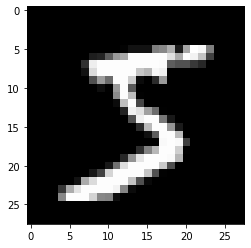

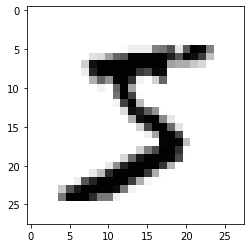

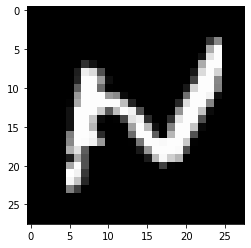

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# download and load mnist data from https://www.openml.org/d/554
# for this tutorial, the data have been downloaded already in './scikit_learn_data'
X, Y = fetch_openml('mnist_784', version=1, data_home='./scikit_learn_data', return_X_y=True)

# make the value of pixels from [0, 255] to [0, 1] for further process
X = X / 255.

# print the first image of the dataset
img1 = X[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
lr = LogisticRegression(penalty='l2',)
lr.fit(X_train,Y_train)
predict_test = lr.predict(X_test)
predict_train = lr.predict(X_train)
test_accuracy = accuracy_score(Y_test,predict_test)
train_accuracy = accuracy_score(Y_train,predict_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))


Training accuracy: 97.42%
Testing accuracy: 86.10%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
from sklearn.svm import LinearSVC
svc = LinearSVC(penalty='l2')
svc.fit(X_train,Y_train)
predict_test = svc.predict(X_test)
predict_train = svc.predict(X_train)
test_accuracy = accuracy_score(Y_test,predict_test)
train_accuracy = accuracy_score(Y_train,predict_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.85%
Testing accuracy: 85.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
from sklearn.svm import LinearSVC
svc = LinearSVC(penalty='l2',loss='hinge',dual=True,tol=0.01,C=10.0,random_state=2)
svc.fit(X_train,Y_train)
predict_test = svc.predict(X_test)
predict_train = svc.predict(X_train)
test_accuracy = accuracy_score(Y_test,predict_test)
train_accuracy = accuracy_score(Y_train,predict_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.73%
Testing accuracy: 83.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
from sklearn.naive_bayes import BernoulliNB
bnb = LinearSVC(penalty='l2')
bnb.fit(X_train,Y_train)
predict_test = bnb.predict(X_test)
predict_train = bnb.predict(X_train)
test_accuracy = accuracy_score(Y_test,predict_test)
train_accuracy = accuracy_score(Y_train,predict_train)
print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 97.85%
Testing accuracy: 85.60%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time


BATCH_SIZE = 128
NUM_EPOCHS = 10
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

In [8]:
import torch.nn.functional as F
import torch.optim as optim
class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)
  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1,320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x,training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(net.parameters(),lr=0.01,momentum=0.5)

In [12]:
from torch.autograd import Variable
# train and evaluate
train_accuracy = []
test_accuracy = []
for epoch in range(NUM_EPOCHS):
  for images, labels in tqdm(train_loader):
    # TODO:forward + backward + optimize
    images,labels = Variable(images).cuda(),Variable(labels).cuda()
    optimizer.zero_grad()
    outputs = net(images)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    # evaluate
    # TODO:calculate the accuracy using traning and testing dataset
    correct = 0
    size = 0
  #for images, labels in tqdm(train_loader):
    images,labels = Variable(images).cuda(),Variable(labels).cuda()
    outputs = net(images)
    predict = outputs.data.max(1)[1]
    size += len(predict)
    correct += predict.eq(labels.data).sum()
  train_accuracy.append(float(100*correct/size))
for epoch in range(NUM_EPOCHS):
  print("epoch",epoch,"train accuracy:%0.2f" % (train_accuracy[epoch]))

net.eval()
correct = 0
for data_test in test_loader:
  images ,labels = data_test
  images,labels = Variable(images).cuda(),Variable(labels).cuda()
  output_test = net(images)
  _,predict = torch.max(output_test,1)
  correct += (predict == labels).sum()
print("Test acc: {0}".format(correct.item() / len(test_dataset)))

100%|██████████| 468/468 [00:07<00:00, 61.79it/s]


epoch 0 train accuracy:98.44
epoch 1 train accuracy:100.00
epoch 2 train accuracy:99.22
epoch 3 train accuracy:99.22
epoch 4 train accuracy:99.22
epoch 5 train accuracy:100.00
epoch 6 train accuracy:97.66
epoch 7 train accuracy:100.00
epoch 8 train accuracy:99.22
epoch 9 train accuracy:100.00
Test acc: 0.9881
